In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [4]:
INSTITUTION_ID = "ins_109508"

In [5]:
# YOUR CODE HERE
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment=PLAID_ENV)
#client = Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment=PLAID_ENV)

client.Institutions.get(2)

{'institutions': [{'country_codes': ['CA'],
   'credentials': [{'label': 'Login ID', 'name': 'username', 'type': 'text'},
    {'label': 'Access Code (PAC)', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_118841',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': 'Access Credit Union - Online Banking',
   'products': ['assets', 'balance', 'transactions', 'income', 'identity'],
   'routing_numbers': []},
  {'country_codes': ['GB'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_119371',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': 'Aegon (Online Services)',
   'products': ['assets', 'balance', 'transactions', 'investments'],
   'routing_numbers': []}],
 're

### 2. Generate a public token

In [6]:
# YOUR CODE HERE
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [7]:
# YOUR CODE HERE
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [8]:
# YOUR CODE HERE
accounts = client.Accounts.get(access_token)

#Iterate in accounts
i = 0
for i in range (0, len(accounts['accounts'])):
    pretty_print_response(accounts['accounts'][i]['account_id'])
    #print(f"Account_ID_{i+1} : {accounts['accounts'][i]['account_id']}")
    i+=1

"1NALAApy4RU8rDEZJMGpsmrQo9NDpGT518A16"
"LKAQAAZj4ksqy1zQmNJlsAdGoWLDNMHP5XV5D"
"pK6l66VLPBsdGxXpWM7qTr5lwo4QKzCLdZAq5"
"oq6W66VXJzfwj3gX6PzlUMN8QGl4BrIRmdWPg"
"gnDNDDVAPgTkB97xPM3vh9mvX81lZbIgJxvGW"
"8MovooGwDrTevX138kp4skv9o5ERKeFwBbkRG"
"EmLnLL4NwQunbP1RmolyFmq1zvLKgwTXNqpMP"
"WjBpBBG8LxIEBLV9aDgRHV17qzypwdilVkJ5K"


---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [9]:
# YOUR CODE HERE
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
transaction_response = client.Transactions.get(access_token,start_date,end_date)
#transaction_response

### 2. Print the categories for each transaction

In [10]:
# YOUR CODE HERE
#pretty_print_response(transaction_response['transactions'][1]['category'])

print("Transaction ID                           Category")
print("---------------------------------------------------------------------------------------")
for transactions in transaction_response['transactions']:
    print(f"{transactions['transaction_id']}    {transactions['category']}")
        

Transaction ID                           Category
---------------------------------------------------------------------------------------
91o5oonVdzFnklbQy5vVFVkx9KgVawtRzLwbW    ['Payment', 'Credit Card']
AAo4oo3QxPUnydkR3pV6FlyeLpzlX4F1R7lKL    ['Travel', 'Car Service', 'Ride Share']
JlyQyyea4phxdZK4eNLniZ39eyNZQBtdpEvWK    ['Transfer', 'Debit']
RdlZllgVQKs6BJjlz4v3HE7d6r1EPWUR7KWr9    ['Transfer', 'Deposit']
6QkLkkWmeqUPe5Eqk9mLCDenB4JDKAugjWpMl    ['Recreation', 'Gyms and Fitness Centers']
G9VRVVP3yMtxX74BP1mZiMroQpjMGVt1JlXrx    ['Travel', 'Airlines and Aviation Services']
nl6b66VpMrh6PkamD9ogHeplZnNeXBU6PdNpl    ['Food and Drink', 'Restaurants', 'Fast Food']
bkRwRRV36MC3lPNvekRnUezXPwAeoDUVg51yp    ['Food and Drink', 'Restaurants', 'Coffee Shop']
mR6a66VLgKhDNzJ9MxGdImWk3Pnml5ULRbnwD    ['Food and Drink', 'Restaurants']
vd6366V5MNsXmjMBpJ5NSzWEKLrzPDfWajB4j    ['Transfer', 'Credit']
X73Q33n1gdTdjBDW4JzNTPwQxolP1Nudp4Nz6    ['Travel', 'Airlines and Aviation Services']
yN6D66l3M7UX

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [11]:
# YOUR CODE HERE
transactions = transaction_response['transactions']
data_df = pd.DataFrame(transactions)[['date', 'name', 'amount', 'category']]
data_df.head()

,date,name,amount,category
0,2020-01-16,CREDIT CARD 3333 PAYMENT *//,25.0,"[Payment, Credit Card]"
1,2020-01-16,Uber 063015 SF**POOL**,5.4,"[Travel, Car Service, Ride Share]"
2,2020-01-15,ACH Electronic CreditGUSTO PAY 123456,5850.0,"[Transfer, Debit]"
3,2020-01-15,CD DEPOSIT .INITIAL.,1000.0,"[Transfer, Deposit]"
4,2020-01-14,Touchstone Climbing,78.5,"[Recreation, Gyms and Fitness Centers]"


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [12]:
# YOUR CODE HERE

data_df['amount'] = data_df['amount'].astype('float')
data_df["date"] = pd.DatetimeIndex(data_df["date"])
data_df.set_index("date", inplace=True)

data_df['category']=data_df.category.apply(', '.join)
#data_df.dtypes
data_df.head()

,name,amount,category
date,,,
2020-01-16,CREDIT CARD 3333 PAYMENT *//,25.0,"Payment, Credit Card"
2020-01-16,Uber 063015 SF**POOL**,5.4,"Travel, Car Service, Ride Share"
2020-01-15,ACH Electronic CreditGUSTO PAY 123456,5850.0,"Transfer, Debit"
2020-01-15,CD DEPOSIT .INITIAL.,1000.0,"Transfer, Deposit"
2020-01-14,Touchstone Climbing,78.5,"Recreation, Gyms and Fitness Centers"


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [13]:
# YOUR CODE HERE
income = client.Income.get(access_token)['income']

gross_income =income['last_year_income_before_tax']
monthly_income = income['income_streams'][0]['monthly_income']
projected_income = income['projected_yearly_income_before_tax']

print(f'Last Year Gross Income  : {gross_income}')
print(f'Current Monthly Income  : {monthly_income}')
print(f'Projected Yearly Income : {projected_income}')

#income                       

Last Year Gross Income  : 7285
Current Monthly Income  : 500
Projected Yearly Income : 7389


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

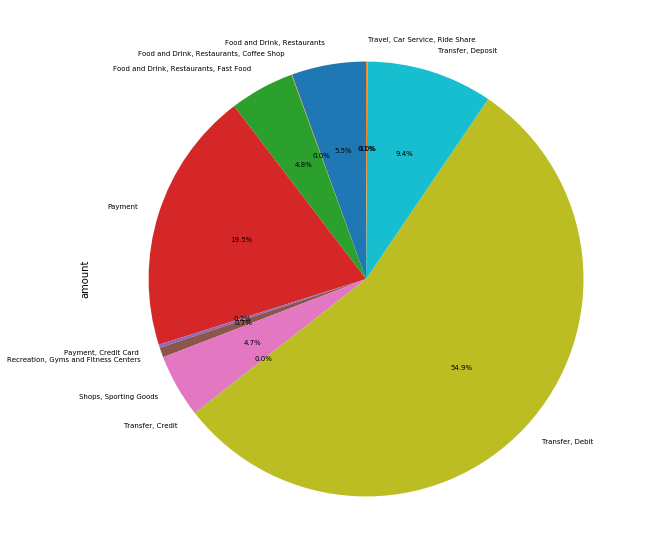

In [14]:
# YOUR CODE HERE
df=data_df.groupby('category').sum().abs().reset_index()
df.plot(kind='pie', y = 'amount', autopct='%1.1f%%', startangle=90, shadow=False, labels=df['category'], legend = False, fontsize=7, figsize=(10,10))

In [15]:
df

,category,amount
0,"Food and Drink, Restaurants",1768.20
1,"Food and Drink, Restaurants, Coffee Shop",12.99
2,"Food and Drink, Restaurants, Fast Food",1536.00
3,Payment,6235.50
4,"Payment, Credit Card",75.00
5,"Recreation, Gyms and Fitness Centers",235.50
6,"Shops, Sporting Goods",1500.00
7,"Transfer, Credit",12.66
8,"Transfer, Debit",17550.00
9,"Transfer, Deposit",3000.00


### Calculate the expenses per month

In [16]:
# YOUR CODE HERE
monthly_expenses = data_df.groupby(by=[data_df.index.month, data_df.index.year]).sum()
monthly_expenses

,,amount
date,date,
1,2020,7060.41
10,2019,3584.83
11,2019,10645.24
12,2019,10645.24


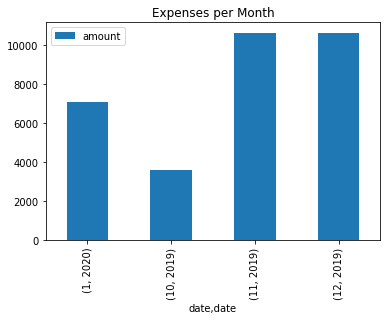

In [17]:
monthly_expenses.plot(kind='bar', title='Expenses per Month')